In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

In [135]:
df=adult.data.original
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [136]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [137]:
df=df.dropna(axis=0,how="any")

In [138]:
df["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [139]:
df["income"]=df["income"].replace({"<=50K.":"<=50K",">50K.":">50K"})

C:\Users\user\AppData\Local\Temp\ipykernel_18512\3746798263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"]=df["income"].replace({"<=50K.":"<=50K",">50K.":">50K"})


In [140]:
df.income.value_counts()

income
<=50K    36080
>50K     11541
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

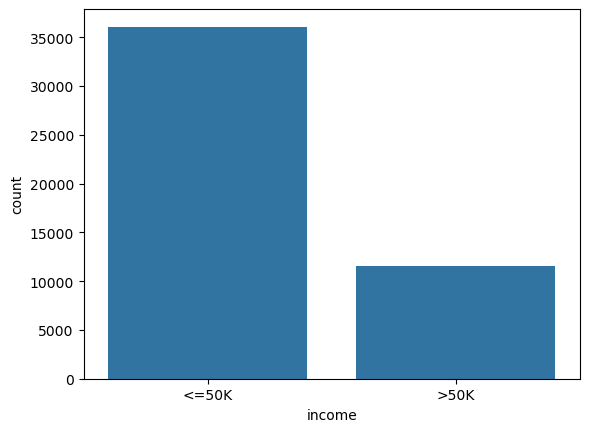

In [141]:
sns.barplot(data=df.income.value_counts())

In [142]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [143]:
df=pd.get_dummies(df,drop_first=True)
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48837,39,215419,13,0,0,36,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48839,38,374983,13,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,44,83891,13,5455,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


## TRAINING WITH LGISTIC REGRESSION

In [144]:
from sklearn.model_selection import train_test_split
X=df.drop("income_>50K",axis=1)
y=df["income_>50K"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.97      0.87     10733
        True       0.72      0.25      0.37      3554

    accuracy                           0.79     14287
   macro avg       0.76      0.61      0.62     14287
weighted avg       0.78      0.79      0.75     14287



## Traing With Logistic Regression:Balancing DataSet

In [146]:
from imblearn.combine import SMOTETomek

Balance=SMOTETomek(random_state=42)
X_balanced,y_balanced=Balance.fit_resample(X_train,y_train)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_balanced,y_balanced)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.93      0.86     10733
        True       0.59      0.30      0.40      3554

    accuracy                           0.78     14287
   macro avg       0.70      0.62      0.63     14287
weighted avg       0.75      0.78      0.75     14287



## TRAINIG WITH LOGISTIC REGRESSION: SCALING

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("model",LogisticRegression(max_iter=2000))
])
pipe.fit(X_balanced,y_balanced)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.93      0.86     10733
        True       0.59      0.30      0.40      3554

    accuracy                           0.78     14287
   macro avg       0.70      0.62      0.63     14287
weighted avg       0.75      0.78      0.75     14287



## TRAINING WITH DECISION TREE

In [149]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.88      0.88     10733
        True       0.63      0.62      0.63      3554

    accuracy                           0.81     14287
   macro avg       0.75      0.75      0.75     14287
weighted avg       0.81      0.81      0.81     14287



In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("model",DecisionTreeClassifier())
])
pipe.fit(X_balanced,y_balanced)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.88      0.88     10733
        True       0.63      0.62      0.63      3554

    accuracy                           0.81     14287
   macro avg       0.75      0.75      0.75     14287
weighted avg       0.81      0.81      0.81     14287



## TRAINING WITH ENSEMBLE XGBOOST

In [151]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.89      0.94      0.92     10733
        True       0.79      0.65      0.71      3554

    accuracy                           0.87     14287
   macro avg       0.84      0.80      0.81     14287
weighted avg       0.87      0.87      0.87     14287



In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("model",XGBClassifier())
])
pipe.fit(X_balanced,y_balanced)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.89      0.94      0.92     10733
        True       0.79      0.65      0.71      3554

    accuracy                           0.87     14287
   macro avg       0.84      0.80      0.81     14287
weighted avg       0.87      0.87      0.87     14287

